

<h1 align="center">Navigating the Allen Brain Observatory</h1> 
<h3 align="center">CSHL Neural Data Analysis</h3>
<h3 align="center">Tuesday July 23, 2019</h3> 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Brain Observatory Setup

In [3]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
# drive_path = '/data/allen-brain-observatory/visual-coding-2p'
# manifest_file = os.path.join(drive_path,'manifest.json')

#temp
manifest_file=r'/Users/saskiad/brain_observatory/manifest.json'
boc = BrainObservatoryCache(manifest_file=manifest_file)

/Users/saskiad/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.PersistentlyDeprecated2018,


`manifest_file` is a path to the manifest file.  This needs to reflect where you are storing and accessing the data. If you leave this out, a manifest file will be created in your working directory, and data will be downloaded to this location.

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 1: Getting oriented to the dataset</h1>

</div>

The Brain Observatory Cache allows us to understand the dimensions of the data in the dataset - the conditions under which each experiment was acquired. It also allows us to access those data, once we select what we want to use.

Let's take a look at the available **imaging depths**, **cre lines**, **areas**, and **stimuli** available in the Brain Observatory dataset.

In [4]:
boc.get_all_targeted_structures()

[u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

In [5]:
boc.get_all_imaging_depths()

[175,
 185,
 195,
 200,
 205,
 225,
 250,
 265,
 275,
 276,
 285,
 300,
 320,
 325,
 335,
 350,
 365,
 375,
 390,
 400,
 550,
 570,
 625]

In [6]:
boc.get_all_cre_lines()

[u'Cux2-CreERT2',
 u'Emx1-IRES-Cre',
 u'Fezf2-CreER',
 u'Nr5a1-Cre',
 u'Ntsr1-Cre_GN220',
 u'Pvalb-IRES-Cre',
 u'Rbp4-Cre_KL100',
 u'Rorb-IRES2-Cre',
 u'Scnn1a-Tg3-Cre',
 u'Slc17a7-IRES2-Cre',
 u'Sst-IRES-Cre',
 u'Tlx3-Cre_PL56',
 u'Vip-IRES-Cre']

#### What are the differences between these Cre lines?

In [7]:
boc.get_all_reporter_lines()

[u'Ai148(TIT2L-GC6f-ICL-tTA2)',
 u'Ai162(TIT2L-GC6s-ICL-tTA2)',
 u'Ai93(TITL-GCaMP6f)',
 u'Ai93(TITL-GCaMP6f)-hyg',
 u'Ai94(TITL-GCaMP6s)']

#### What are the differences between these reporter lines?

In [8]:
boc.get_all_stimuli()

['drifting_gratings',
 'locally_sparse_noise',
 'locally_sparse_noise_4deg',
 'locally_sparse_noise_8deg',
 'natural_movie_one',
 'natural_movie_three',
 'natural_movie_two',
 'natural_scenes',
 'spontaneous',
 'static_gratings']

In [10]:
boc.get_all_session_types()

[u'three_session_A',
 u'three_session_B',
 u'three_session_C',
 u'three_session_C2']

### Other boc functions
These "get all X" functions return the unique values for key experiment parameters. We can use these parameters to find experiments of interest and use other boc functions to get those data.

### 1.1 Experiment containers & sessions

The experiment container describes a set of 3 imaging sessions performed for the same field of view (ie. same targeted area and imaging depth in the same mouse that targets the same set of neurons). Each experiment container has a unique ID number.

> Choose a visual area and Cre line from the lists above

In [22]:
visual_area = 'VISp'
cre_line ='Cux2-CreERT2'

In [23]:
exps = boc.get_experiment_containers(targeted_structures=[visual_area], cre_lines=[cre_line])

<b>get_experiment_containers</b> returns a list of experiment containers that meets the conditions we have specified. If we don't pass any parameters, it returns all experiment containers. 

In [24]:
print("There are " +str(len(exps))+ " experiment containers for "+ visual_area +" and "+ cre_line)

There are 16 experiment containers for VISp and Cux2-CreERT2


What information do we get from this list? Make a dataframe of this list, to compare the information for each container.

In [25]:
pd.DataFrame(exps)

,cre_line,donor_name,failed,id,imaging_depth,reporter_line,specimen_name,tags,targeted_structure
0,Cux2-CreERT2,222426,False,511510736,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222426,[],VISp
1,Cux2-CreERT2,229106,False,511510855,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-229106,[],VISp
2,Cux2-CreERT2,222420,False,511509529,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222420,[],VISp
3,Cux2-CreERT2,222424,False,511507650,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222424,[],VISp
4,Cux2-CreERT2,225037,False,511510699,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-225037,[],VISp
5,Cux2-CreERT2,382421,False,702934962,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-382421,[],VISp
6,Cux2-CreERT2,348262,False,645413757,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-348262,[],VISp
7,Cux2-CreERT2,360565,False,659767480,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-360565,[],VISp
8,Cux2-CreERT2,222425,False,511510650,175,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-222425,[],VISp
9,Cux2-CreERT2,390323,False,712178509,275,Ai93(TITL-GCaMP6f),Cux2-CreERT2;Camk2a-tTA;Ai93-390323,[],VISp


> Let's look at one experiment container, imaged from Cux2, in VISp, from imaging depth 175 um.

In [26]:
experiment_container_id = 511510736

In [28]:
sessions = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

<b>get_ophys_experiments</b> returns a list of imaging sessions for the conditions that we specified (in this case we passed a single experiment container id). If we don't pass any parameters, it returns all imaging sessions. What other keywords can we use to select imaging sessions?

In [29]:
pd.DataFrame(sessions)

,acquisition_age_days,cre_line,donor_name,experiment_container_id,fail_eye_tracking,id,imaging_depth,reporter_line,session_type,specimen_name,targeted_structure
0,104,Cux2-CreERT2,222426,511510736,True,501704220,175,Ai93(TITL-GCaMP6f),three_session_A,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp
1,103,Cux2-CreERT2,222426,511510736,True,501559087,175,Ai93(TITL-GCaMP6f),three_session_B,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp
2,102,Cux2-CreERT2,222426,511510736,True,501474098,175,Ai93(TITL-GCaMP6f),three_session_C,Cux2-CreERT2;Camk2a-tTA;Ai93-222426,VISp


!['Diagram of containers'](http://alleninstitute.github.io/AllenSDK/_static/container_session_layout.png)

> Let's get the id for the imaging session for this container that container natural scenes

In [34]:
session_id = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], stimuli=['natural_scenes'])[0]['id']

In [35]:
print(session_id)

501559087


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">

<h1> Part 2: Getting data for an experiment</h1>


</div>

The Ophys Experiment data object gives us access to everything in the NWB file for a single imaging session

In [37]:
data_set = boc.get_ophys_experiment_data(ophys_experiment_id=session_id)

2019-06-26 16:14:55,995 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/514429113


### 2.1 Maximum projection
This is the projection of the full motion corrected movie. It shows all of the cells imaged during the session.

In [38]:
max_projection = data_set.get_max_projection()

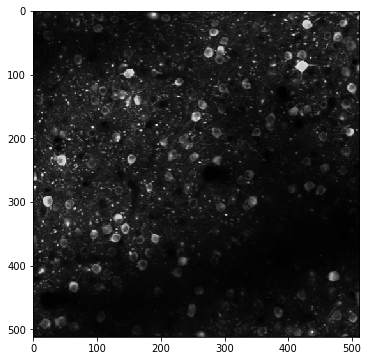

In [39]:
fig = plt.figure(figsize=(6,6))
plt.imshow(max_projection, cmap='gray')

### 2.2 ROI Masks
These are all of the segmented masks for cell bodies in this experiment.

In [41]:
rois = data_set.get_roi_mask_array()

In [42]:
print(rois.shape)
print("Number of cells:", rois.shape[0])

(174, 512, 512)
('Number of cells:', 174)


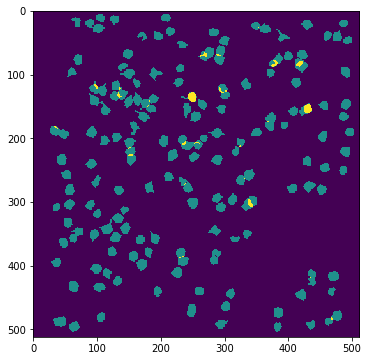

In [43]:
plt.figure(figsize=(6,6))
plt.imshow(rois.sum(axis=0))

### 2.3 DF/F Traces
There are a number of accessible traces in the NWB file, including raw fluorescence, neuropil corrected traces, demixed traces, and DF/F traces. 

In [44]:
ts, dff = data_set.get_dff_traces()

In [45]:
dff.shape

(174, 113888)

Let's look at the first neuron

Text(0,0.5,u'DFF (%)')

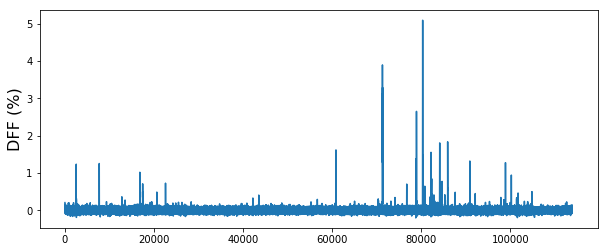

In [49]:
plt.figure(figsize=(10,4))

plt.plot(dff[0,:])

plt.ylabel("DFF (%)", fontsize=16)

Let's look at the first 50 cells. 

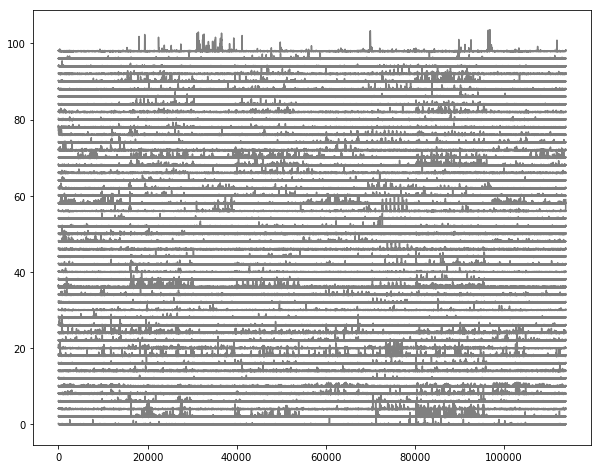

In [50]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')

It looks like different cells are active at different times. What could that be about?

### 2.4 Stimulus epochs

Several stimuli are shown during each imaging session, interleaved with each other. The stimulus epoch table provides information of these interleaved stimulus epochs


In [52]:
stim_epoch = data_set.get_stimulus_epoch_table()

In [53]:
stim_epoch

,stimulus,start,end
0,static_gratings,747,15196
1,natural_scenes,16100,30551
2,spontaneous,30701,39581
3,natural_scenes,39582,54050
4,static_gratings,54953,69403
5,natural_movie_one,70307,79338
6,natural_scenes,80241,96126
7,static_gratings,97406,113662


> Overlay stimulus epochs on the DFF traces

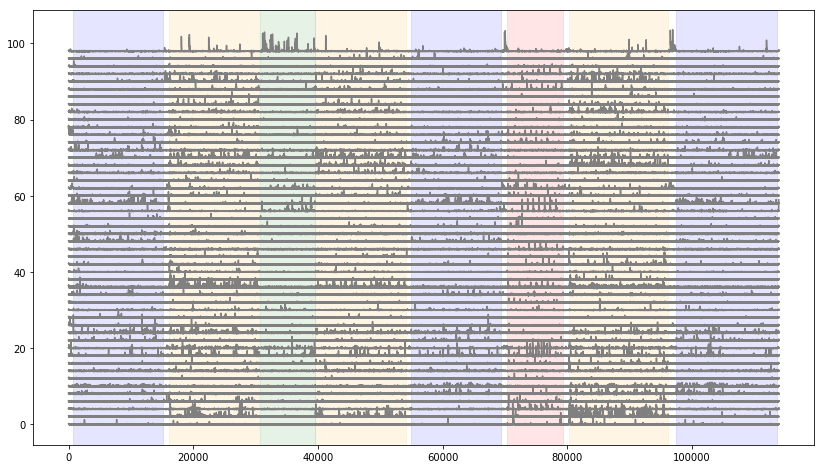

In [140]:
fig = plt.figure(figsize=(14,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.5 Running speed

The running speed of the animal on the rotating disk during the entire session.

In [56]:
dxcm, tsd = data_set.get_running_speed()

Text(0,0.5,u'Running speed (cm/s)')

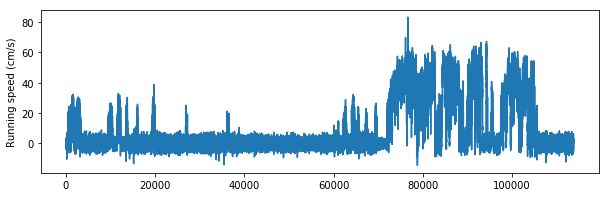

In [57]:
fig = plt.figure(figsize=(10,3))
plt.plot(dxcm)
plt.ylabel("Running speed (cm/s)")

> Add the running speed to the neural activity and stimulus epoch figure

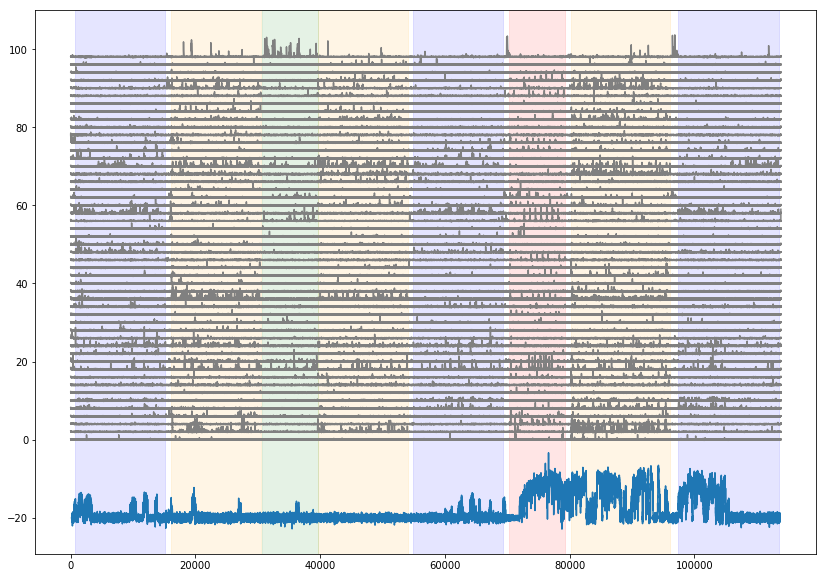

In [118]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### Interesting things

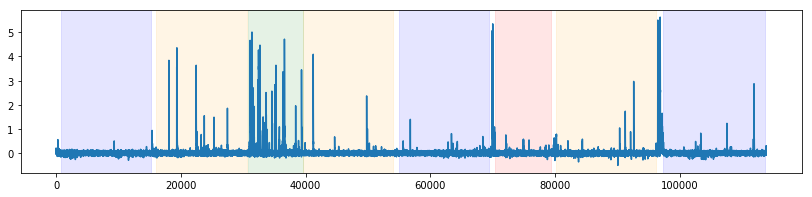

In [121]:
fig = plt.figure(figsize=(14,3))
plt.plot(dff[49,:])
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

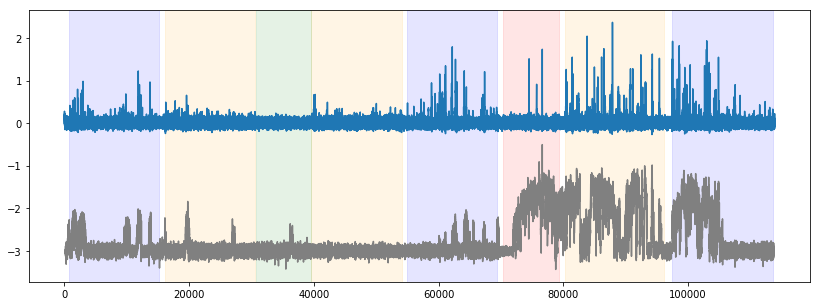

In [138]:
fig = plt.figure(figsize=(14,5))
plt.plot(dff[4,:])
plt.plot((0.03*dxcm)-3, 'gray')
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

In [137]:
st.pearsonr(dff[4,np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

(0.094741453789573479, 1.0634469890945502e-224)

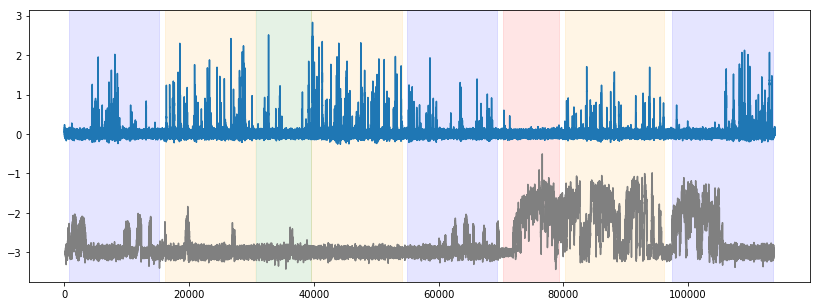

In [136]:
fig = plt.figure(figsize=(14,5))
plt.plot(dff[35,:])
plt.plot((0.03*dxcm)-3, 'gray')
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

In [139]:
st.pearsonr(dff[35,np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

(-0.0969435160184971, 3.2362632583015149e-235)

### 2.5b Extracted events
As of the October 2018 data release, we are providing access to events extracted from the DFF traces using the L0 method developed by Sean Jewell and Daniella Witten. These are not stored in the NWB file, thus aren't a function of the data_set object, but are available through the boc

In [87]:
events = boc.get_ophys_experiment_events(ophys_experiment_id=session_id)

2019-06-26 23:28:25,710 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://api.brain-map.org/api/v2/well_known_file_download/739721211


In [88]:
events.shape

(174, 113888)

(20000, 22000)

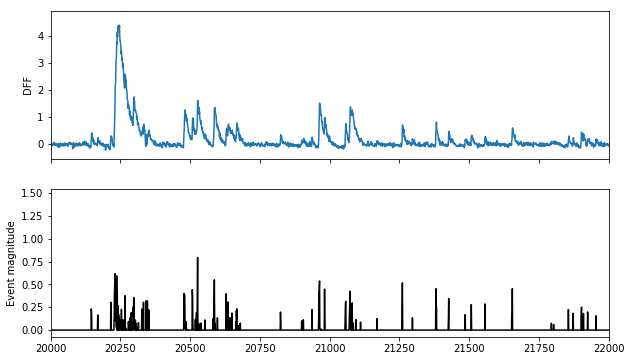

In [114]:
fig, (ax1,ax2) = plt.subplots(2,1, sharex=True, figsize=(10,6))
ax2.plot(events[1,:], 'k')
ax2.set_ylabel("Event magnitude")
ax1.plot(dff[1,:])
ax1.set_ylabel("DFF")
plt.xlim(20000, 22000)

> Remake our plot of neural activty, stimulus, and running using events

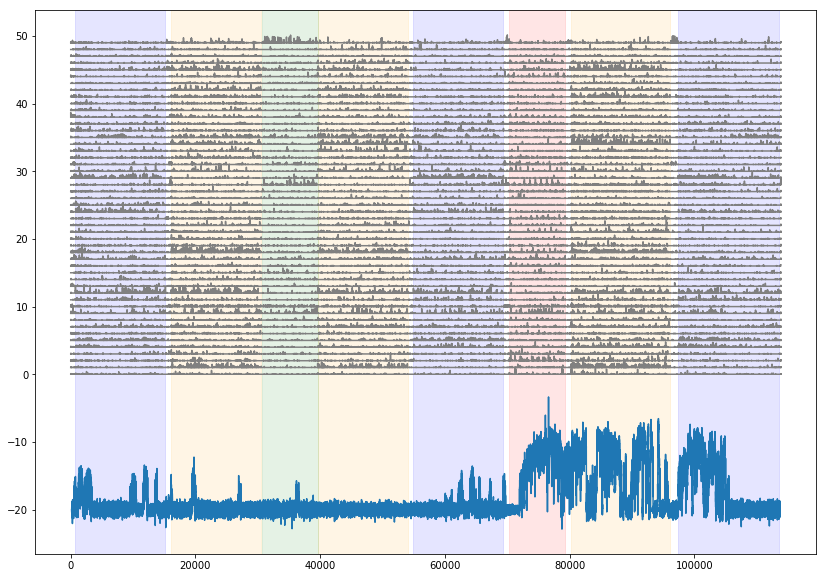

In [141]:
fig = plt.figure(figsize=(14,10))
for i in range(50):
    plt.plot(events[i,:]+(i*1), color='gray')
plt.plot((0.2*dxcm)-20)
    
#for each stimulus, shade the plot when the stimulus is presented
colors = ['blue','orange','green','red']
for c,stim_name in enumerate(stim_epoch.stimulus.unique()):
    stim = stim_epoch[stim_epoch.stimulus==stim_name]
    for j in range(len(stim)):
        plt.axvspan(xmin=stim.start.iloc[j], xmax=stim.end.iloc[j], color=colors[c], alpha=0.1)

### 2.6 Stimulus Table
For each stimulus there is a stimulus table with information about the condition and timing of each trial. 

In [60]:
natural_scene_table = data_set.get_stimulus_table('natural_scenes')

In [61]:
natural_scene_table.head()

,frame,start,end
0,81,16100,16107
1,33,16108,16115
2,76,16115,16122
3,13,16123,16130
4,56,16130,16137


In [62]:
static_gratings_table = data_set.get_stimulus_table('static_gratings')

In [63]:
static_gratings_table.head()

,orientation,spatial_frequency,phase,start,end
0,90.0,0.04,0.50,747,754
1,150.0,0.04,0.50,754,761
2,30.0,0.02,0.00,762,769
3,0.0,0.32,0.50,769,776
4,150.0,0.16,0.75,777,784


### 2.7 Stimulus Template

The images and movies presented during the session area also included in the NWB file as the stimulus template. Stimuli that are generated programmatically (eg. drifting and static gratings) do not have a stimulus template. There are tools in the SDK to recreate these stimuli.

In [64]:
natural_scene_template = data_set.get_stimulus_template('natural_scenes')

In [65]:
natural_scene_template.shape

(118, 918, 1174)

> Look at the scene presented for the first trial

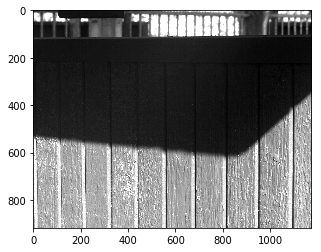

In [66]:
scene_number = natural_scene_table.frame.loc[0]
plt.imshow(natural_scene_template[scene_number,:,:], cmap='gray')

> Plot the time when this image is presented overlayed on the activity the 50 neurons

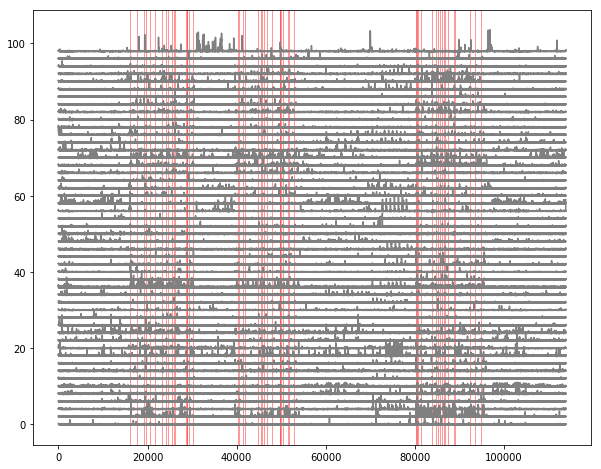

In [67]:
fig = plt.figure(figsize=(10,8))
for i in range(50):
    plt.plot(dff[i,:]+(i*2), color='gray')
    
#shade traces with the time of each presentation of the above scene
stim_subset = natural_scene_table[natural_scene_table.frame==scene_number]
for j in range(len(stim_subset)):
    plt.axvspan(xmin=stim_subset.start.iloc[j], xmax=stim_subset.end.iloc[j], color='red', alpha=0.4)

### 2.8 Metadata
This includes metadata about the experiment, some of which we used to select this experiment, some of which is only included here.

In [68]:
data_set.get_metadata()

{'age_days': 104,
 'cre_line': u'Cux2-CreERT2/wt',
 'device': u'Nikon A1R-MP multiphoton microscope',
 'device_name': u'CAM2P.2',
 'excitation_lambda': u'910 nanometers',
 'experiment_container_id': 511510736,
 'fov': u'400x400 microns (512 x 512 pixels)',
 'genotype': u'Cux2-CreERT2/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 175,
 'indicator': u'GCaMP6f',
 'ophys_experiment_id': 501559087,
 'pipeline_version': u'3.0',
 'session_start_time': datetime.datetime(2016, 2, 4, 10, 25, 24),
 'session_type': u'three_session_B',
 'sex': u'male',
 'specimen_name': u'Cux2-CreERT2;Camk2a-tTA;Ai93-222426',
 'targeted_structure': u'VISp'}

New metadata includes: age, sex, device & device_name, genotype, start_time.  Note: start_time is not the time the experiment was collected, but rather the time the NWB file was created.  We are hoping to fix this soon.  :(

### 2.9 Motion correction
This returns a dataframe of the motion correction applied to each frame of the movie for both x and y.

In [69]:
motion = data_set.get_motion_correction()

In [71]:
motion.head()

,x_motion,y_motion,timestamp
0,-0.138904,0.719560,26.71893
1,0.146145,0.211090,26.75218
2,0.785496,0.079419,26.78542
3,0.786664,0.143973,26.81867
4,-0.186681,0.197409,26.85191


Text(0,0.5,u'Pixels')

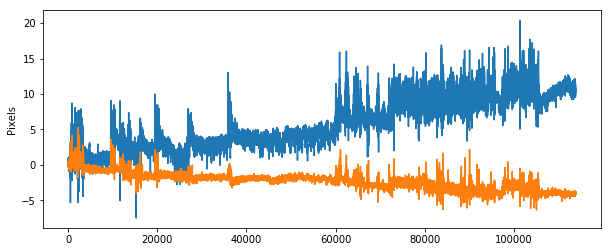

In [74]:
plt.figure(figsize=(10,4))
plt.plot(motion.x_motion)
plt.plot(motion.y_motion)
plt.ylabel("Pixels")


### pupil area/location
### cell specimens id / indices
### show how to get the trace for a single cell
### cell specimen table
### events

In [75]:
motion_all = np.sqrt(motion.x_motion**2 + motion.y_motion**2)

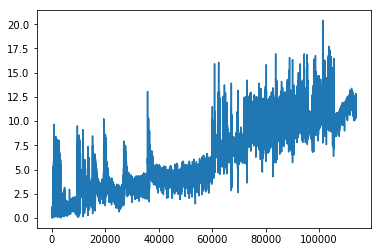

In [76]:
plt.plot(motion_all)

In [78]:
import scipy.stats as st

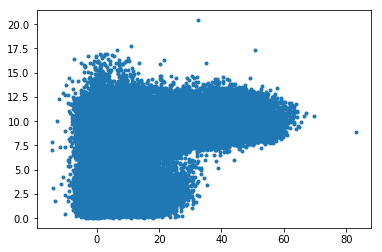

In [86]:
plt.plot(dxcm, motion_all, '.')

In [84]:
st.pearsonr(motion_all[np.isfinite(dxcm)], dxcm[np.isfinite(dxcm)])

(0.49839002820288958, 0.0)